<a href="https://colab.research.google.com/github/KlymentievMaksym/IntelOb/blob/main/Lab3/Lab3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from urllib.request import urlopen
test_images = urlopen("https://web.mit.edu/torralba/www/TestImages.txt").read().decode('utf-8').split()
train_images = urlopen("https://web.mit.edu/torralba/www/TrainImages.txt").read().decode('utf-8').split()

from os import path, listdir

import cv2
from PIL import Image

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow as tf
layers = tf.keras.layers

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# tf.config.optimizer.set_jit(True)


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Read Data

  5%|▌         | 31/604 [00:13<02:09,  4.42it/s]

./drive/MyDrive/Data/Images/bar/bar_0527.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 15%|█▍        | 10/67 [02:35<12:08, 12.77s/it]

./drive/MyDrive/Data/Images/buffet/Buffet_Set_Up_2_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

./drive/MyDrive/Data/Images/buffet/Buffet_Set_Up_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

./drive/MyDrive/Data/Images/buffet/Buffet_Lettuce_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 25%|██▌       | 88/346 [00:07<00:05, 48.06it/s]

./drive/MyDrive/Data/Images/corridor/Corridor_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 54%|█████▍    | 187/346 [00:09<00:01, 84.76it/s]

./drive/MyDrive/Data/Images/corridor/down_corridor_frame_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




  3%|▎         | 4/135 [00:02<01:15,  1.74it/s]

./drive/MyDrive/Data/Images/closet/closet_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 70%|██████▉   | 94/135 [00:04<00:00, 89.88it/s]

./drive/MyDrive/Data/Images/closet/closet_design_lg_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 33%|███▎      | 38/114 [00:03<00:03, 24.41it/s]

./drive/MyDrive/Data/Images/computerroom/url_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 66%|██████▌   | 75/114 [00:04<00:00, 59.14it/s]

./drive/MyDrive/Data/Images/computerroom/aula_informatica_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 27%|██▋       | 36/131 [00:03<00:03, 24.35it/s]

./drive/MyDrive/Data/Images/dentaloffice/Modern_Dental_Office_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 61%|██████▏   | 168/274 [00:08<00:01, 95.44it/s]

./drive/MyDrive/Data/Images/dining_room/stylise_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 61%|██████▏   | 78/127 [00:08<00:06,  8.12it/s]

./drive/MyDrive/Data/Images/gameroom/gameroom_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 68%|██████▊   | 145/213 [00:08<00:01, 37.60it/s]

./drive/MyDrive/Data/Images/grocerystore/grocerypic2_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 22%|██▏       | 26/116 [00:03<00:04, 21.51it/s]

./drive/MyDrive/Data/Images/fastfood_restaurant/melvados_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 45%|████▍     | 52/116 [00:03<00:01, 45.20it/s]

./drive/MyDrive/Data/Images/fastfood_restaurant/subway_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

./drive/MyDrive/Data/Images/fastfood_restaurant/connies_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

./drive/MyDrive/Data/Images/fastfood_restaurant/panther_grill_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 64%|██████▍   | 66/103 [00:06<00:02, 12.79it/s]

./drive/MyDrive/Data/Images/garage/salmon_garage_after_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 75%|███████▌  | 76/101 [00:05<00:01, 17.57it/s]

./drive/MyDrive/Data/Images/greenhouse/1412_mb_file_0a8c5_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 80%|███████▉  | 101/127 [00:10<00:01, 19.98it/s]

./drive/MyDrive/Data/Images/kindergarden/ClassroomLarge_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 61%|██████    | 167/276 [00:09<00:02, 38.63it/s]

./drive/MyDrive/Data/Images/laundromat/A1_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 90%|████████▉ | 632/706 [00:18<00:00, 151.79it/s]

./drive/MyDrive/Data/Images/livingroom/salon28_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 76%|███████▌  | 177/233 [00:09<00:00, 66.77it/s]

./drive/MyDrive/Data/Images/meeting_room/conferencerm2_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 75%|███████▍  | 50/67 [09:46<02:33,  9.06s/it]

./drive/MyDrive/Data/Images/mall/city_stars_mall_egyptgif_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 19%|█▉        | 33/174 [00:03<00:04, 29.72it/s]

./drive/MyDrive/Data/Images/poolinside/indooPool_Inside_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




 45%|████▌     | 68/151 [00:03<00:01, 49.37it/s]

./drive/MyDrive/Data/Images/waitingroom/vestibul2_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




  2%|▏         | 5/269 [00:04<04:15,  1.03it/s]

./drive/MyDrive/Data/Images/winecellar/wine_cellar_floor_stone_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

./drive/MyDrive/Data/Images/winecellar/front_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

./drive/MyDrive/Data/Images/winecellar/Img5_gif.jpg OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'




100%|██████████| 67/67 [12:31<00:00, 11.22s/it]


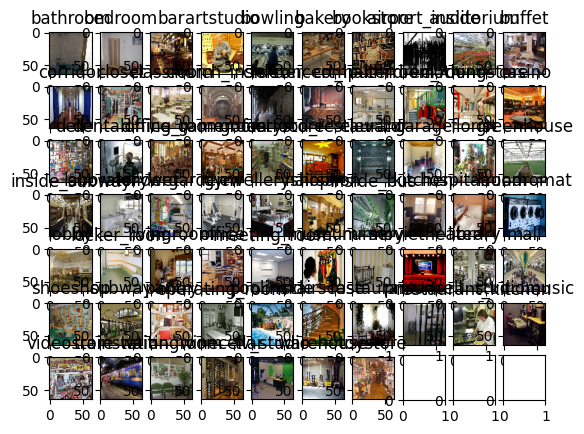

In [4]:
data = []
labels = []

size = (64, 64)
# path  = "./app/Lab3/Data/Images"
path  = "./drive/MyDrive/Data/Images"
images = listdir(path)
subplot_size = len(images)
# plt.figure(figsize=(120, 120))
fig, ax = plt.subplots(subplot_size//10 + 1, 10)
# plt.figure(figsize=(20, 20))
for category in tqdm(images):
    for image in tqdm(listdir(f"{path}/{category}"), leave=False):
        try:
            filepath = f"{path}/{category}/{image}"
            # filepath
            img = cv2.imread(filepath)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, size)
            img = img / 255.0
            data.append(img)
            labels.append(category)
        except Exception as e:
            print(filepath, e)  #, img
            # try:
            #     filepath = path.join(f"./Data/Images/{category}/{image}")
            #     img = Image.open(filepath)
            #     img = img.resize(size)
            #     img = np.array(img)
            #     img = img / 255.0
            #     data.append(img)
            #     labels.append(category)
            # except Exception as e:
            #     print(filepath, e, img)

    ax[images.index(category)//10, images.index(category)%10].imshow(data[-1])
    ax[images.index(category)//10, images.index(category)%10].set_title(category)


plt.show()
data = np.array(data)
labels = np.array(labels)

In [5]:
labels.shape

(15590,)

In [6]:
data.shape

(15590, 64, 64, 3)

# Transform Data

In [7]:
string = labels.copy()
string = string[sorted(np.unique(string, return_index=True)[1])]
str_to_int = dict(zip(string, range(len(string))))
int_to_str = dict(zip(range(len(string)), string))


In [8]:
labels


array(['bathroom', 'bathroom', 'bathroom', ..., 'toystore', 'toystore',
       'toystore'], dtype='<U19')

In [9]:
def transform(x):
    return str_to_int[x]
if labels.dtype == "<U19":
    labels = np.array(list(map(transform, labels)))
labels

array([ 0,  0,  0, ..., 66, 66, 66])

In [ ]:
# data = data[...,::-1]

# Split Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

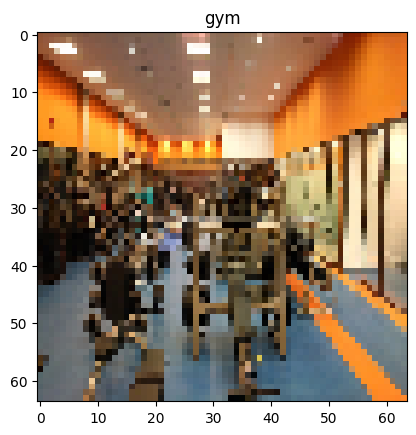

In [11]:
integer = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[integer])
plt.title(int_to_str[np.argmax(y_train[integer])])
plt.show()

# Help Fuctions

In [12]:
def display_history(history, names, title):
    plt.figure()
    plt.title(title)
    plt.plot(history.history[names[0]], label=names[0])
    plt.plot(history.history[names[1]], label=names[1])
    plt.xlabel("Epochs")
    plt.ylabel(names[0])
    plt.legend()
    plt.show()

def predict_random(model, data_x=X_test, data_y=y_test):
    choose = np.random.randint(0, data_x.shape[0])
    plt.imshow(data_x[choose])
    predictions = model.predict(data_x)
    # plt.title(f'Predicted Object: {np.argmax(predictions[choose]) + 1} | Real Object: {np.argmax(data_y[choose]) + 1}')
    plt.title(f'Predicted Object: {int_to_str[np.argmax(predictions[choose])]} | Real Object: {int_to_str[np.argmax(data_y[choose])]}')

def predict(model, batch_size=64, epochs=40, val_split=0.2):
    # history = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
    if isinstance(val_split, float):
        history = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    elif isinstance(val_split, tuple):
        history = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_data=val_split)
    display_history(history, ['loss', 'val_loss'], "Loss")
    display_history(history, ['accuracy', 'val_accuracy'], "Accuracy")
    model.evaluate(X_test, y_test)
    predict_random(model, X_test, y_test)

# Baseline

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,115,651 (8.07 MB)

 Trainable params: 2,115,587 (8.07 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - Top2: 0.0802 - accuracy: 0.0418 - loss: 4.5676 - val_Top2: 0.1090 - val_accuracy: 0.0633 - val_loss: 4.1089
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - Top2: 0.1299 - accuracy: 0.0729 - loss: 3.9688 - val_Top2: 0.1399 - val_accuracy: 0.0701 - val_loss: 3.9791
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - Top2: 0.1371 - accuracy: 0.0755 - loss: 3.8898 - val_Top2: 0.1747 - val_accuracy: 0.1078 - val_loss: 3.7902
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - Top2: 0.1605 - accuracy: 0.0885 - loss: 3.7647 - val_Top2: 0.2032 - val_accuracy: 0.1146 - val_loss: 3.6639
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - Top2: 0.1716 - accuracy: 0.0991 - loss: 3.7108 - val_Top2: 0.1980 - val_accuracy: 0.1166 - val_loss: 3.6494
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - Top2: 0.1919 - accuracy: 0.1132 - loss: 3.5771 - val_Top2: 0.2277 - val_accuracy: 0.1327 - val_loss: 3.5667
Epoch 7/30

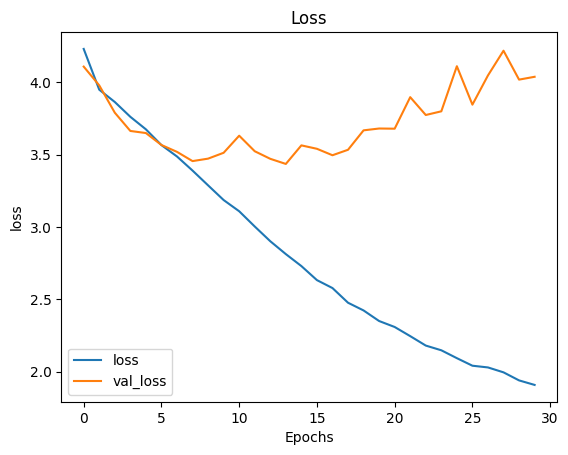

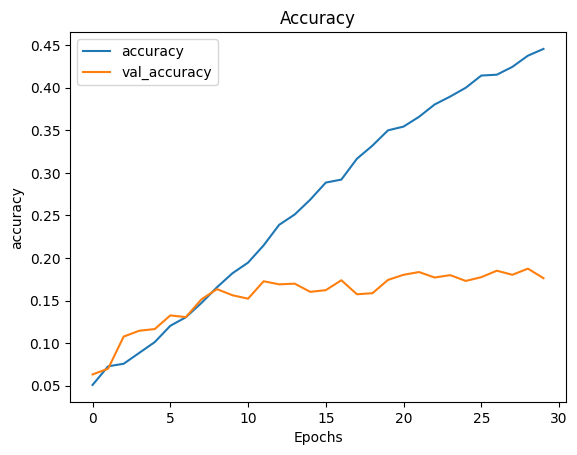

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - Top2: 0.2638 - accuracy: 0.1675 - loss: 4.0339
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


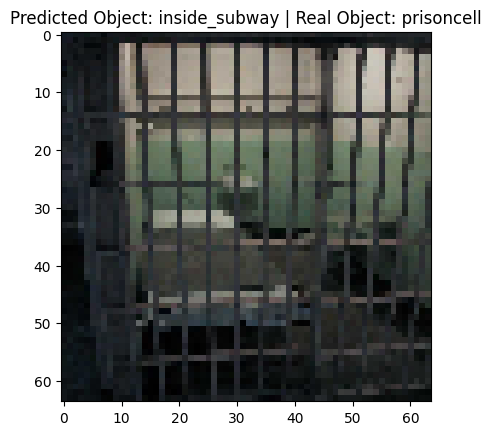

In [ ]:
model_baseline = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model_baseline.summary()
model_baseline.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_baseline, 64, 30)

# More Conv2D

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,947 (620.89 KB)

 Trainable params: 158,819 (620.39 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - Top2: 0.0899 - accuracy: 0.0523 - loss: 4.4467 - val_Top2: 0.0625 - val_accuracy: 0.0253 - val_loss: 5.0617
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - Top2: 0.1892 - accuracy: 0.1069 - loss: 3.6903 - val_Top2: 0.0826 - val_accuracy: 0.0321 - val_loss: 5.8420
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - Top2: 0.2162 - accuracy: 0.1312 - loss: 3.5345 - val_Top2: 0.1214 - val_accuracy: 0.0541 - val_loss: 5.0609
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - Top2: 0.2560 - accuracy: 0.1566 - loss: 3.3619 - val_Top2: 0.2902 - val_accuracy: 0.1852 - val_loss: 3.2863
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - Top2: 0.2672 - accuracy: 0.1653 - loss: 3.2883 - val_Top2: 0.2305 - val_accuracy: 0.1443 - val_loss: 3.5611
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - Top2: 0.2943 - accuracy: 0.1845 - loss: 3.1845 - val_Top2: 0.2846 - val_accuracy: 0.1900 - val_loss: 3.2888
Epoch 7/30

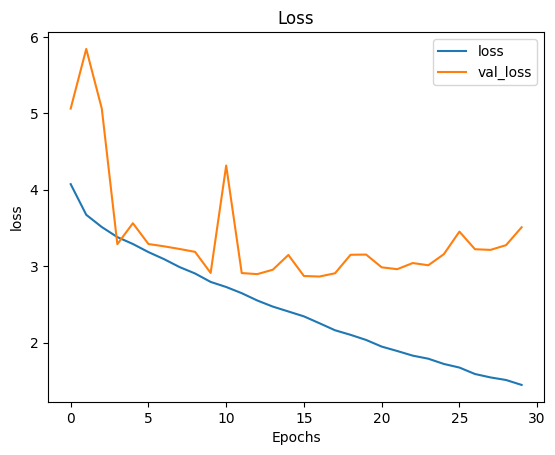

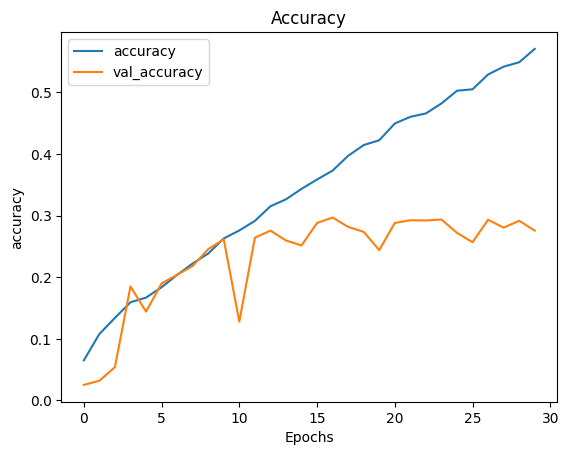

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - Top2: 0.3838 - accuracy: 0.2722 - loss: 3.4786
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


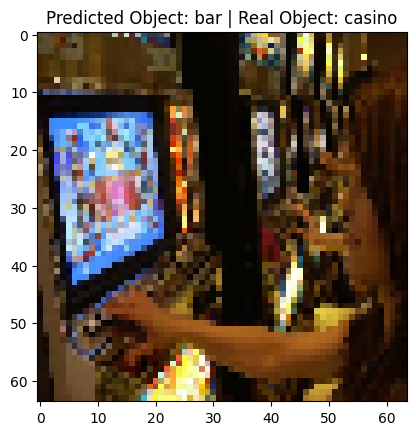

In [ ]:
model_more_conv = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model_more_conv.summary()
model_more_conv.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_more_conv, 64, 30)

# Even more Conv2D

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 4, 4, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,443 (177.51 KB)

 Trainable params: 45,251 (176.76 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - Top2: 0.0963 - accuracy: 0.0530 - loss: 4.2097 - val_Top2: 0.0537 - val_accuracy: 0.0132 - val_loss: 4.4470
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - Top2: 0.1915 - accuracy: 0.1076 - loss: 3.6118 - val_Top2: 0.0585 - val_accuracy: 0.0253 - val_loss: 5.5109
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - Top2: 0.2390 - accuracy: 0.1395 - loss: 3.3974 - val_Top2: 0.0834 - val_accuracy: 0.0521 - val_loss: 5.0089
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - Top2: 0.2758 - accuracy: 0.1665 - loss: 3.2489 - val_Top2: 0.2505 - val_accuracy: 0.1559 - val_loss: 3.3764
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - Top2: 0.3115 - accuracy: 0.1911 - loss: 3.0986 - val_Top2: 0.2449 - val_accuracy: 0.1571 - val_loss: 3.4237
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 116ms/step - Top2: 0.3312 - accuracy: 0.2089 - loss: 3.0142 - val_Top2: 0.2822 - val_accuracy: 0.1792 - val_loss: 3.2507
Epoch 7/30

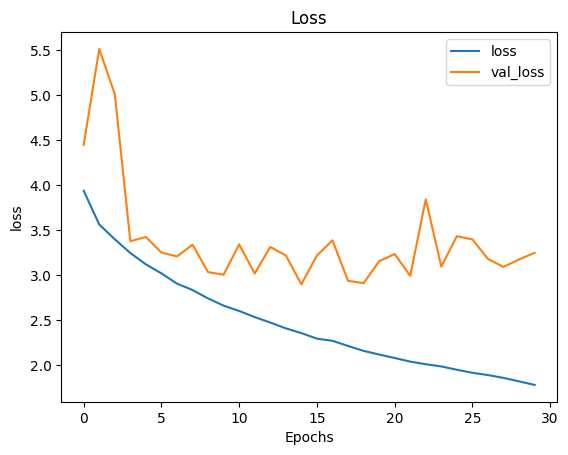

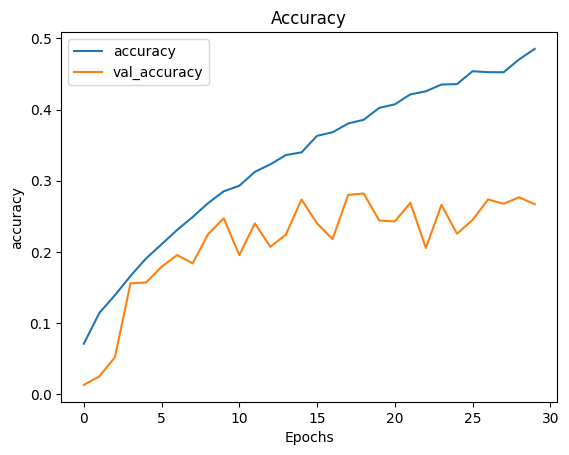

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - Top2: 0.3729 - accuracy: 0.2571 - loss: 3.2655
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


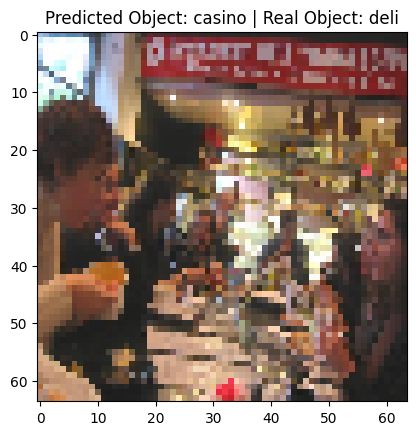

In [ ]:
model_even_more_conv = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model_even_more_conv.summary()
model_even_more_conv.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_even_more_conv, 64, 30)

# More Conv2D with more Filters

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,387 (564.01 KB)

 Trainable params: 143,939 (562.26 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - Top2: 0.1116 - accuracy: 0.0609 - loss: 4.3655 - val_Top2: 0.0325 - val_accuracy: 0.0132 - val_loss: 6.9733
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - Top2: 0.2028 - accuracy: 0.1214 - loss: 3.6140 - val_Top2: 0.0517 - val_accuracy: 0.0132 - val_loss: 8.0643
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - Top2: 0.2505 - accuracy: 0.1498 - loss: 3.3883 - val_Top2: 0.1034 - val_accuracy: 0.0405 - val_loss: 5.2765
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - Top2: 0.2874 - accuracy: 0.1756 - loss: 3.2438 - val_Top2: 0.2770 - val_accuracy: 0.1756 - val_loss: 3.2685
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - Top2: 0.3234 - accuracy: 0.2100 - loss: 3.0599 - val_Top2: 0.2902 - val_accuracy: 0.1812 - val_loss: 3.4276
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - Top2: 0.3627 - accuracy: 0.2440 - loss: 2.9238 - val_Top2: 0.2834 - val_accuracy: 0.1876 - val_loss: 3.4239
Epoch 7/30

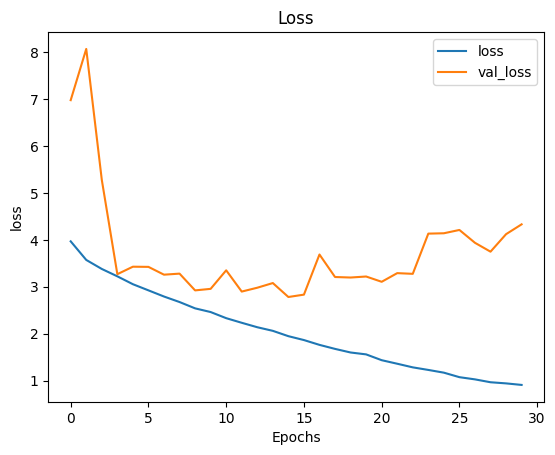

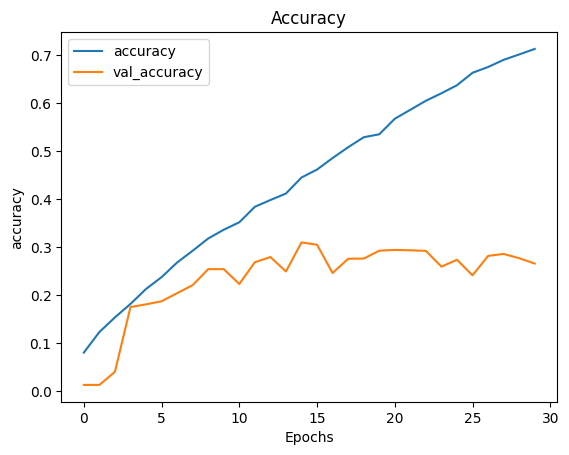

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - Top2: 0.3835 - accuracy: 0.2735 - loss: 4.1997
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


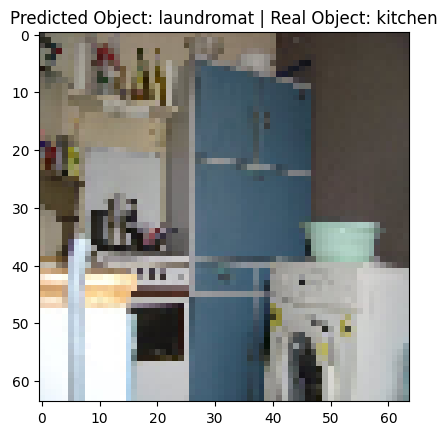

In [ ]:
model_more_conv_filters = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model_more_conv_filters.summary()
model_more_conv_filters.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_more_conv_filters, 64, 30)

# Lesser MaxPooling2D

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,907 (2.43 MB)

 Trainable params: 635,459 (2.42 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 73s 457ms/step - Top2: 0.0803 - accuracy: 0.0418 - loss: 4.6337 - val_Top2: 0.0224 - val_accuracy: 0.0156 - val_loss: 18.4634
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 71s 452ms/step - Top2: 0.1387 - accuracy: 0.0756 - loss: 3.9082 - val_Top2: 0.0577 - val_accuracy: 0.0136 - val_loss: 17.6189
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 71s 457ms/step - Top2: 0.1549 - accuracy: 0.0893 - loss: 3.7818 - val_Top2: 0.1299 - val_accuracy: 0.0709 - val_loss: 5.3435
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 71s 457ms/step - Top2: 0.1768 - accuracy: 0.0976 - loss: 3.6741 - val_Top2: 0.2076 - val_accuracy: 0.1174 - val_loss: 3.7316
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 71s 455ms/step - Top2: 0.2062 - accuracy: 0.1166 - loss: 3.5681 - val_Top2: 0.2633 - val_accuracy: 0.1760 - val_loss: 3.4331
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 71s 453ms/step - Top2: 0.2155 - accuracy: 0.1276 - loss: 3.4868 - val_Top2: 0.2485 - val_accuracy: 0.1539 - val_loss: 3.3754
Epoch 7/

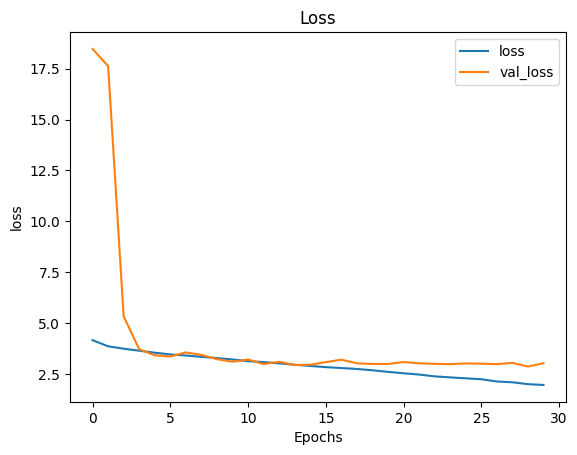

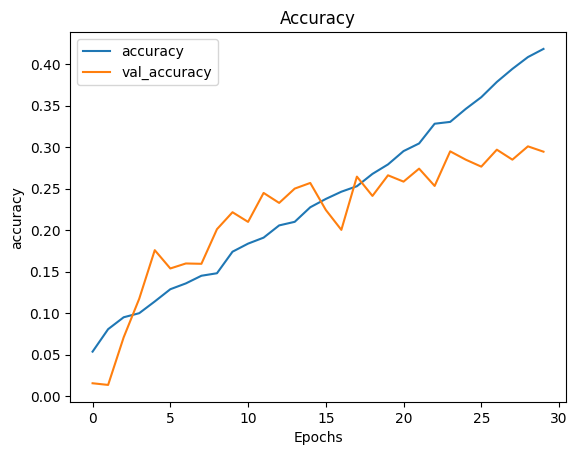

98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - Top2: 0.4132 - accuracy: 0.2836 - loss: 3.0607
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step


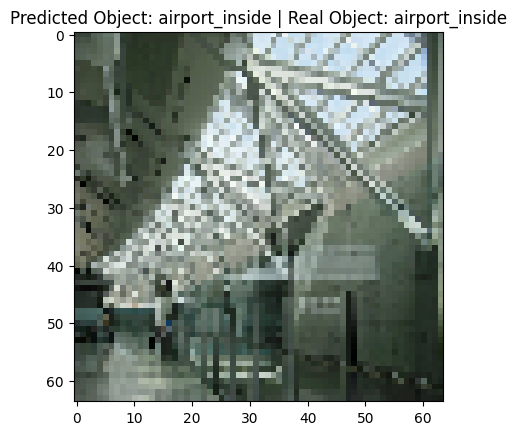

In [ ]:
model_less_pool = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D(4, 4),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model_less_pool.summary()
model_less_pool.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_less_pool, 64, 30)

# Revert Lesser MaxPooling2D

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,907 (2.43 MB)

 Trainable params: 635,459 (2.42 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 23s 134ms/step - Top2: 0.1132 - accuracy: 0.0624 - loss: 4.1985 - val_Top2: 0.0545 - val_accuracy: 0.0176 - val_loss: 6.5137
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - Top2: 0.2033 - accuracy: 0.1162 - loss: 3.6368 - val_Top2: 0.0846 - val_accuracy: 0.0269 - val_loss: 7.8149
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - Top2: 0.2396 - accuracy: 0.1451 - loss: 3.4488 - val_Top2: 0.1463 - val_accuracy: 0.0854 - val_loss: 5.0282
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - Top2: 0.2811 - accuracy: 0.1689 - loss: 3.2587 - val_Top2: 0.2597 - val_accuracy: 0.1591 - val_loss: 3.5199
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - Top2: 0.3075 - accuracy: 0.1942 - loss: 3.1463 - val_Top2: 0.3010 - val_accuracy: 0.1900 - val_loss: 3.2560
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - Top2: 0.3421 - accuracy: 0.2213 - loss: 3.0014 - val_Top2: 0.3002 - val_accuracy: 0.1988 - val_loss: 3.3704
Epoch 7/30

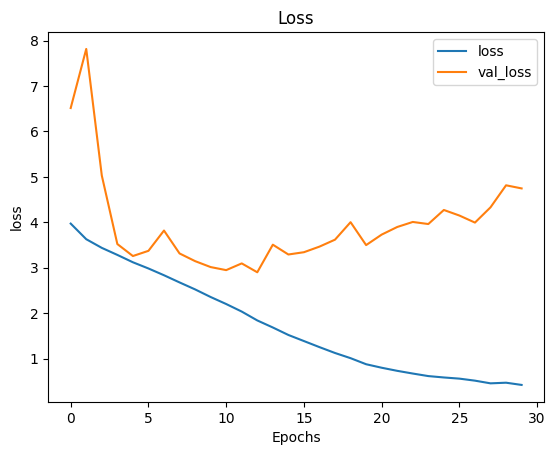

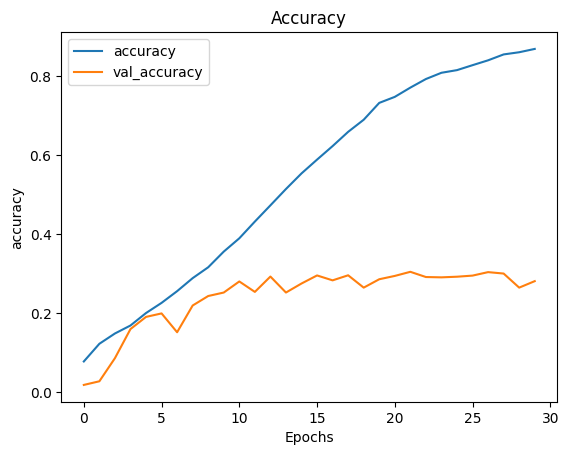

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - Top2: 0.3966 - accuracy: 0.2681 - loss: 4.7066
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


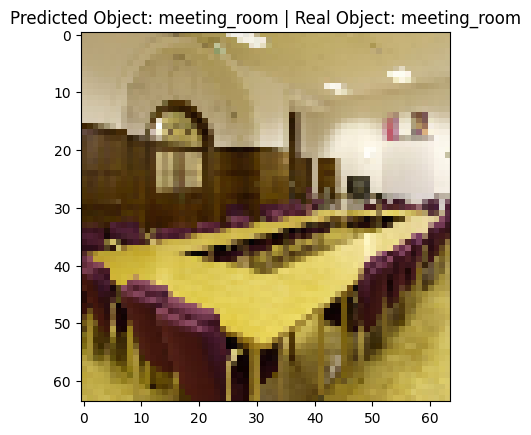

In [ ]:
model_less_pool_r = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model_less_pool_r.summary()
model_less_pool_r.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_less_pool_r, 64, 30)

# Revert More Conv2D with more Filters

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 64, 64, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 4, 4, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,403 (478.14 KB)

 Trainable params: 121,955 (476.39 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 91s 570ms/step - Top2: 0.1096 - accuracy: 0.0568 - loss: 4.1720 - val_Top2: 0.0545 - val_accuracy: 0.0180 - val_loss: 4.7652
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 88s 564ms/step - Top2: 0.2101 - accuracy: 0.1158 - loss: 3.5307 - val_Top2: 0.0545 - val_accuracy: 0.0136 - val_loss: 6.0585
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 88s 562ms/step - Top2: 0.2611 - accuracy: 0.1499 - loss: 3.3458 - val_Top2: 0.0677 - val_accuracy: 0.0329 - val_loss: 5.3404
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 88s 565ms/step - Top2: 0.2936 - accuracy: 0.1807 - loss: 3.1860 - val_Top2: 0.2469 - val_accuracy: 0.1535 - val_loss: 3.4500
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 88s 565ms/step - Top2: 0.3354 - accuracy: 0.2103 - loss: 3.0212 - val_Top2: 0.3046 - val_accuracy: 0.1960 - val_loss: 3.1787
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 88s 565ms/step - Top2: 0.3664 - accuracy: 0.2362 - loss: 2.9045 - val_Top2: 0.3030 - val_accuracy: 0.1964 - val_loss: 3.2619
Epoch 7/30

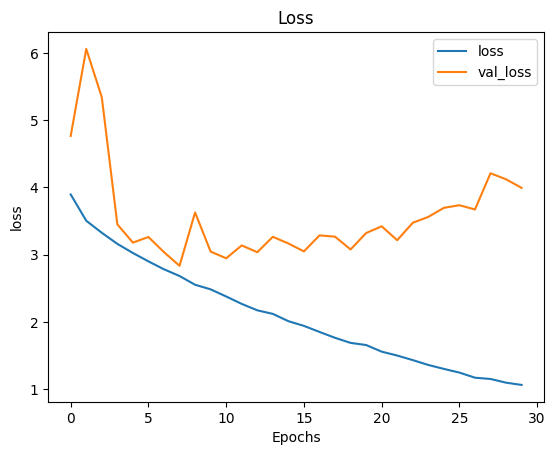

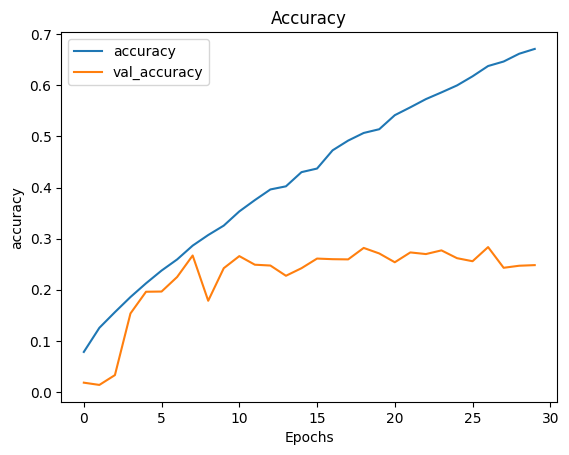

98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - Top2: 0.3492 - accuracy: 0.2306 - loss: 4.0770
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step


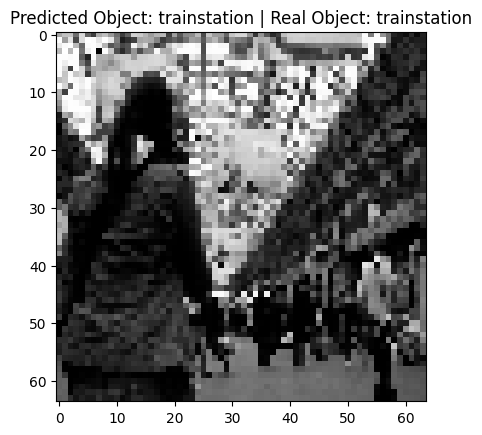

In [ ]:
model_more_conv_filters_r = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model_more_conv_filters_r.summary()
model_more_conv_filters_r.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_more_conv_filters_r, 64, 30)

# Slower Learning Rate

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,907 (2.43 MB)

 Trainable params: 635,459 (2.42 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 76s 473ms/step - Top2: 0.0336 - accuracy: 0.0182 - loss: 8.9685 - val_Top2: 0.0457 - val_accuracy: 0.0269 - val_loss: 4.3859
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 73s 469ms/step - Top2: 0.0384 - accuracy: 0.0187 - loss: 8.1477 - val_Top2: 0.0537 - val_accuracy: 0.0273 - val_loss: 4.5174
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 74s 471ms/step - Top2: 0.0430 - accuracy: 0.0229 - loss: 7.4302 - val_Top2: 0.0485 - val_accuracy: 0.0277 - val_loss: 4.7032
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 73s 471ms/step - Top2: 0.0394 - accuracy: 0.0214 - loss: 7.0166 - val_Top2: 0.0585 - val_accuracy: 0.0301 - val_loss: 4.8456
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 73s 470ms/step - Top2: 0.0407 - accuracy: 0.0199 - loss: 6.6564 - val_Top2: 0.0649 - val_accuracy: 0.0357 - val_loss: 4.8469
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 74s 473ms/step - Top2: 0.0413 - accuracy: 0.0233 - loss: 6.2963 - val_Top2: 0.0633 - val_accuracy: 0.0381 - val_loss: 4.7564
Epoch 7/30

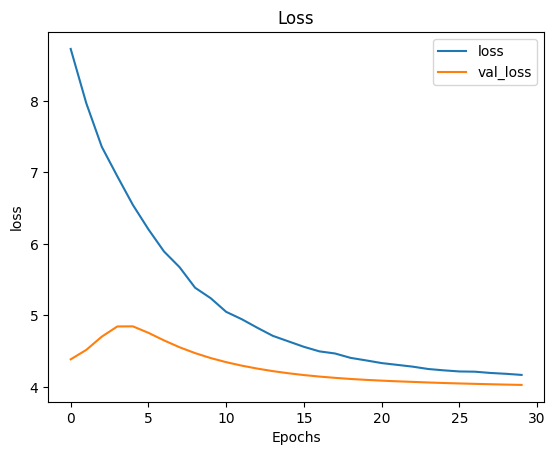

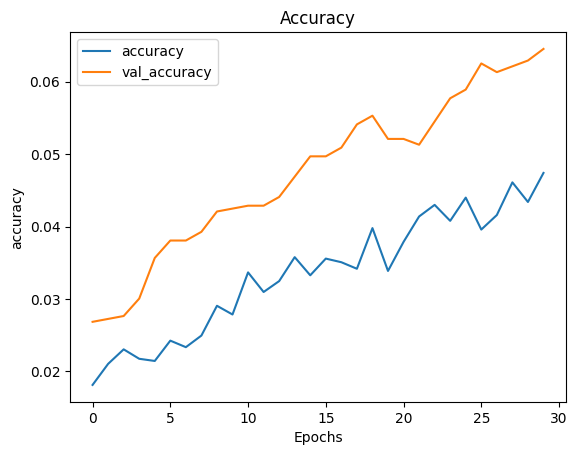

98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - Top2: 0.1060 - accuracy: 0.0609 - loss: 4.0307
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step


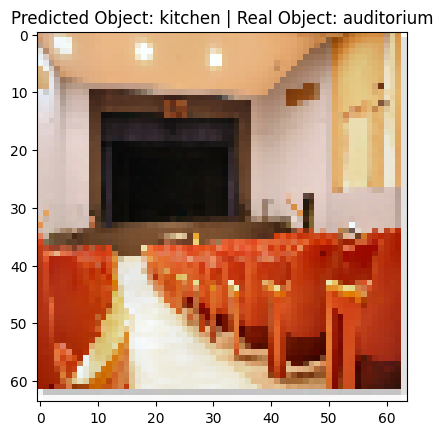

In [ ]:
model_learn_rate = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        # layers.MaxPooling2D(4, 4),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model_learn_rate.summary()
model_learn_rate.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model_learn_rate, 64, 300)

Epoch 1/300
156/156 ━━━━━━━━━━━━━━━━━━━━ 76s 484ms/step - Top2: 0.0854 - accuracy: 0.0479 - loss: 4.1711 - val_Top2: 0.1150 - val_accuracy: 0.0673 - val_loss: 4.0232
Epoch 2/300
156/156 ━━━━━━━━━━━━━━━━━━━━ 75s 484ms/step - Top2: 0.0855 - accuracy: 0.0445 - loss: 4.1487 - val_Top2: 0.1162 - val_accuracy: 0.0677 - val_loss: 4.0189
Epoch 3/300
156/156 ━━━━━━━━━━━━━━━━━━━━ 75s 484ms/step - Top2: 0.0869 - accuracy: 0.0500 - loss: 4.1305 - val_Top2: 0.1162 - val_accuracy: 0.0681 - val_loss: 4.0146
Epoch 4/300
156/156 ━━━━━━━━━━━━━━━━━━━━ 76s 490ms/step - Top2: 0.0862 - accuracy: 0.0476 - loss: 4.1483 - val_Top2: 0.1170 - val_accuracy: 0.0653 - val_loss: 4.0113
Epoch 5/300
156/156 ━━━━━━━━━━━━━━━━━━━━ 75s 483ms/step - Top2: 0.0941 - accuracy: 0.0503 - loss: 4.1255 - val_Top2: 0.1198 - val_accuracy: 0.0665 - val_loss: 4.0073
Epoch 6/300
156/156 ━━━━━━━━━━━━━━━━━━━━ 75s 482ms/step - Top2: 0.0918 - accuracy: 0.0540 - loss: 4.1244 - val_Top2: 0.1226 - val_accuracy: 0.0677 - val_loss: 4.0034
Epoc

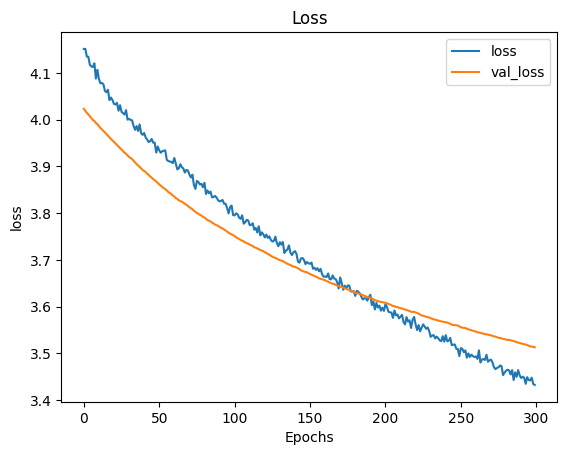

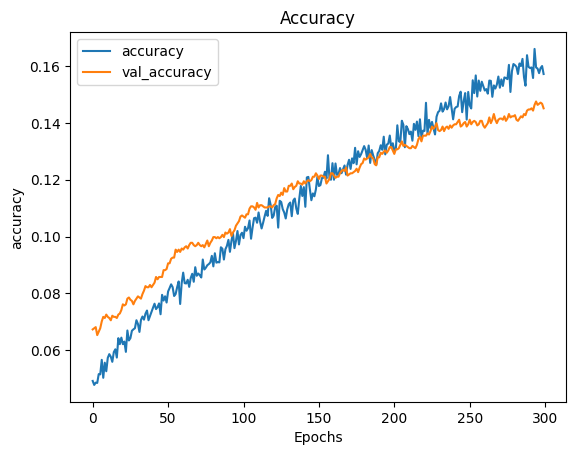

98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - Top2: 0.2432 - accuracy: 0.1521 - loss: 3.5164
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step


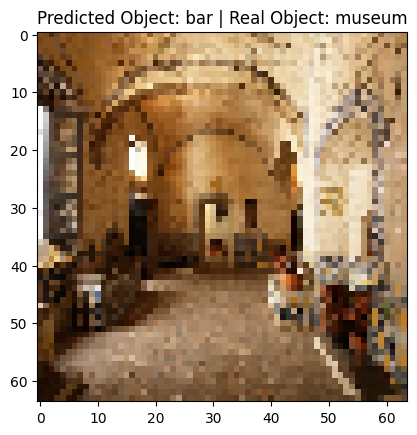

In [ ]:
predict(model_learn_rate, 64, 300)


In [ ]:
model_learn_rate.save('model_learn_rate.keras')

# ...

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 67)             │        17,219 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455,619 (1.74 MB)

 Trainable params: 454,723 (1.73 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 53s 323ms/step - Top2: 0.0880 - accuracy: 0.0448 - loss: 4.5279 - val_Top2: 0.0545 - val_accuracy: 0.0132 - val_loss: 8.2201
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 47s 298ms/step - Top2: 0.1620 - accuracy: 0.0926 - loss: 3.7856 - val_Top2: 0.0293 - val_accuracy: 0.0132 - val_loss: 10.0002
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 46s 294ms/step - Top2: 0.1906 - accuracy: 0.1068 - loss: 3.6346 - val_Top2: 0.0569 - val_accuracy: 0.0200 - val_loss: 8.0018
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 46s 296ms/step - Top2: 0.2127 - accuracy: 0.1223 - loss: 3.5405 - val_Top2: 0.1395 - val_accuracy: 0.0733 - val_loss: 4.6299
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 46s 295ms/step - Top2: 0.2321 - accuracy: 0.1382 - loss: 3.4560 - val_Top2: 0.2389 - val_accuracy: 0.1475 - val_loss: 3.5546
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 46s 294ms/step - Top2: 0.2559 - accuracy: 0.1519 - loss: 3.3735 - val_Top2: 0.2894 - val_accuracy: 0.1760 - val_loss: 3.2878
Epoch 7/3

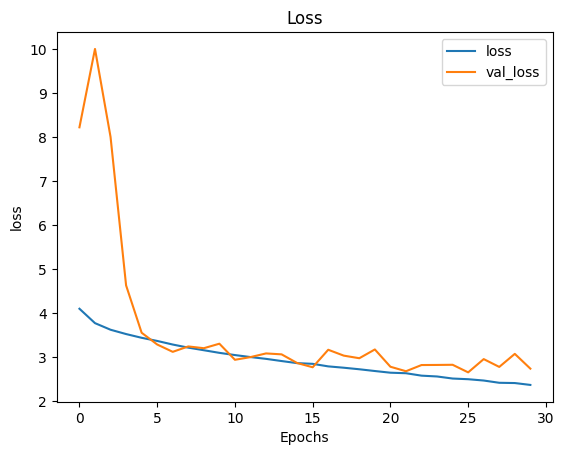

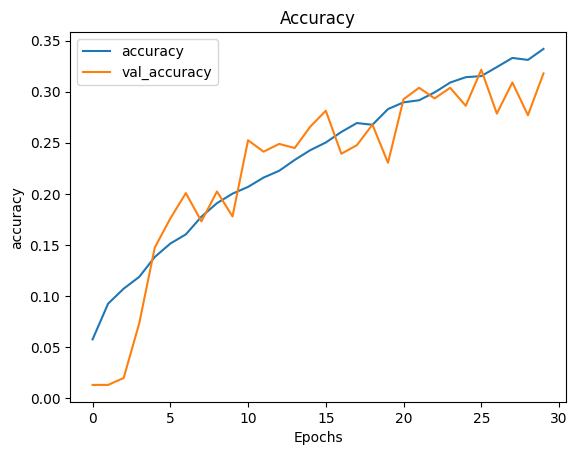

98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - Top2: 0.4358 - accuracy: 0.2973 - loss: 2.7901
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


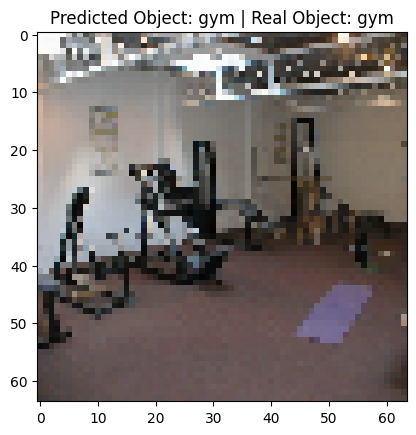

In [ ]:
model1 = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.4),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model1.summary()
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model1, 64, 60)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 67)             │        17,21

 Total params: 658,627 (2.51 MB)

 Trainable params: 657,283 (2.51 MB)

 Non-trainable params: 1,344 (5.25 KB)

Epoch 1/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - Top2: 0.1024 - accuracy: 0.0546 - loss: 4.5279 - val_Top2: 0.0629 - val_accuracy: 0.0405 - val_loss: 5.6542
Epoch 2/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - Top2: 0.1812 - accuracy: 0.1073 - loss: 3.7354 - val_Top2: 0.0589 - val_accuracy: 0.0156 - val_loss: 6.5486
Epoch 3/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - Top2: 0.2130 - accuracy: 0.1261 - loss: 3.5771 - val_Top2: 0.0986 - val_accuracy: 0.0621 - val_loss: 5.2842
Epoch 4/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - Top2: 0.2392 - accuracy: 0.1414 - loss: 3.4584 - val_Top2: 0.2613 - val_accuracy: 0.1639 - val_loss: 3.3718
Epoch 5/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - Top2: 0.2705 - accuracy: 0.1636 - loss: 3.3381 - val_Top2: 0.2072 - val_accuracy: 0.1311 - val_loss: 3.7203
Epoch 6/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - Top2: 0.2815 - accuracy: 0.1777 - loss: 3.2645 - val_Top2: 0.2786 - val_accuracy: 0.1764 - val_loss: 3.3667
Epoch 7/60
156/156 ━

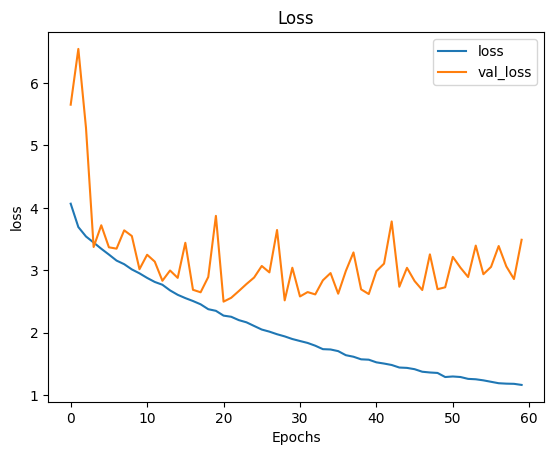

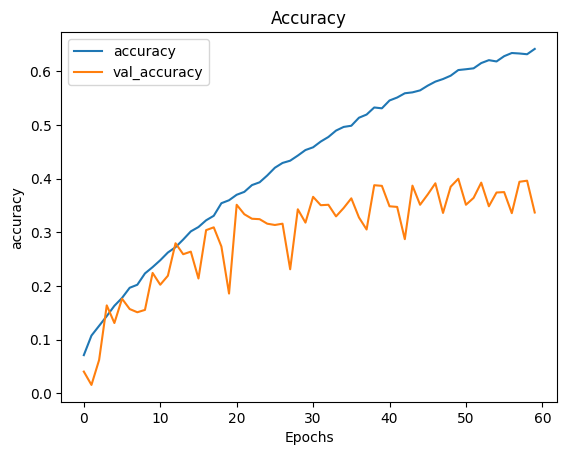

98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - Top2: 0.4739 - accuracy: 0.3428 - loss: 3.4134
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


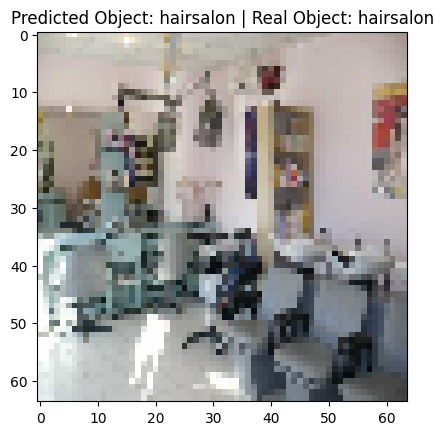

In [13]:
model = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.4),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model, 64, 60)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 128)      │             

 Total params: 1,444,387 (5.51 MB)

 Trainable params: 1,442,083 (5.50 MB)

 Non-trainable params: 2,304 (9.00 KB)

Epoch 1/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 32s 106ms/step - Top2: 0.0925 - accuracy: 0.0517 - loss: 4.4256 - val_Top2: 0.0717 - val_accuracy: 0.0485 - val_loss: 4.4078
Epoch 2/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - Top2: 0.1685 - accuracy: 0.0912 - loss: 3.7672 - val_Top2: 0.0854 - val_accuracy: 0.0405 - val_loss: 4.9771
Epoch 3/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - Top2: 0.2011 - accuracy: 0.1124 - loss: 3.6047 - val_Top2: 0.0946 - val_accuracy: 0.0453 - val_loss: 4.7496
Epoch 4/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - Top2: 0.2297 - accuracy: 0.1412 - loss: 3.5029 - val_Top2: 0.2405 - val_accuracy: 0.1519 - val_loss: 3.4734
Epoch 5/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - Top2: 0.2554 - accuracy: 0.1485 - loss: 3.3750 - val_Top2: 0.2489 - val_accuracy: 0.1499 - val_loss: 3.4566
Epoch 6/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - Top2: 0.2804 - accuracy: 0.1726 - loss: 3.2773 - val_Top2: 0.2697 - val_accuracy: 0.1639 - val_loss: 3.3715
Epoch 7/60
156/156

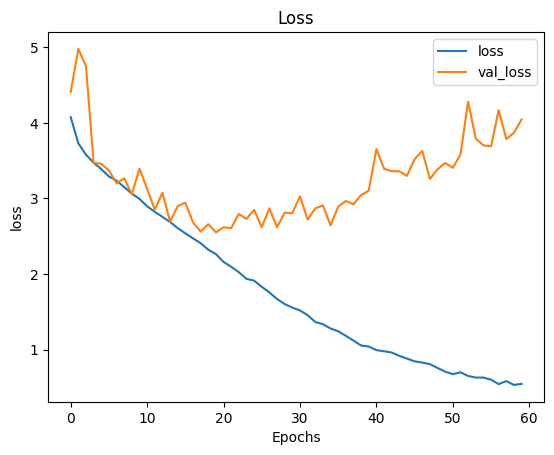

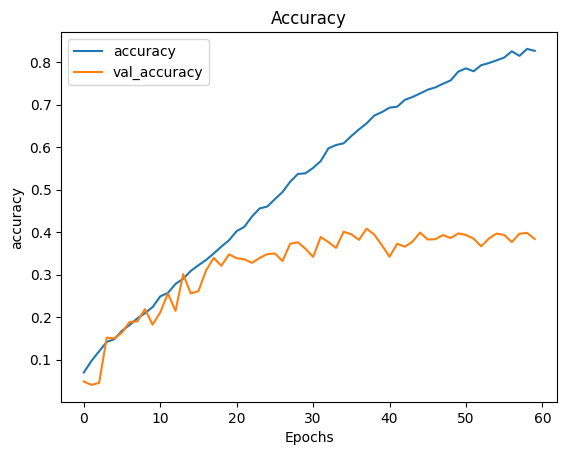

98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - Top2: 0.5172 - accuracy: 0.3801 - loss: 4.0951
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


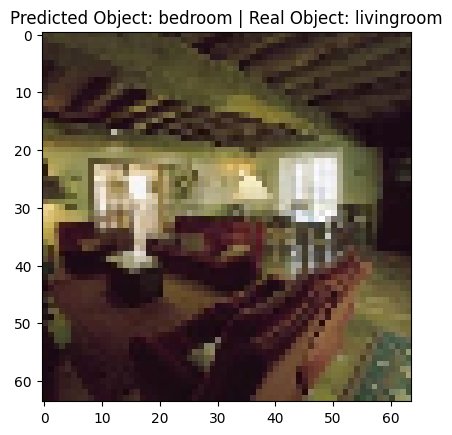

In [14]:
model2 = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.4),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),

        layers.MaxPooling2D(4, 4),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model2.summary()
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model2, 64, 60)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 67)             │        34,371 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 538,563 (2.05 MB)

 Trainable params: 537,667 (2.05 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - Top2: 0.0903 - accuracy: 0.0495 - loss: 4.7425 - val_Top2: 0.0437 - val_accuracy: 0.0140 - val_loss: 9.8136
Epoch 2/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - Top2: 0.1639 - accuracy: 0.0917 - loss: 3.8110 - val_Top2: 0.0733 - val_accuracy: 0.0160 - val_loss: 10.5095
Epoch 3/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - Top2: 0.1825 - accuracy: 0.1028 - loss: 3.6538 - val_Top2: 0.0870 - val_accuracy: 0.0445 - val_loss: 6.2318
Epoch 4/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - Top2: 0.2149 - accuracy: 0.1206 - loss: 3.5467 - val_Top2: 0.2100 - val_accuracy: 0.1150 - val_loss: 4.0112
Epoch 5/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - Top2: 0.2333 - accuracy: 0.1359 - loss: 3.4618 - val_Top2: 0.2721 - val_accuracy: 0.1735 - val_loss: 3.3382
Epoch 6/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - Top2: 0.2560 - accuracy: 0.1512 - loss: 3.3513 - val_Top2: 0.2248 - val_accuracy: 0.1351 - val_loss: 3.4750
Epoch 7/60
156/156 ━

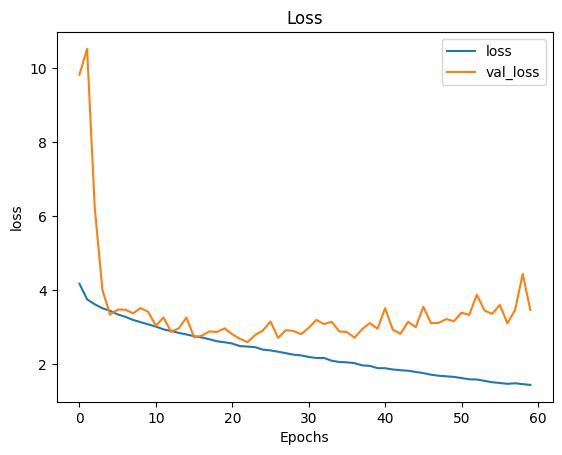

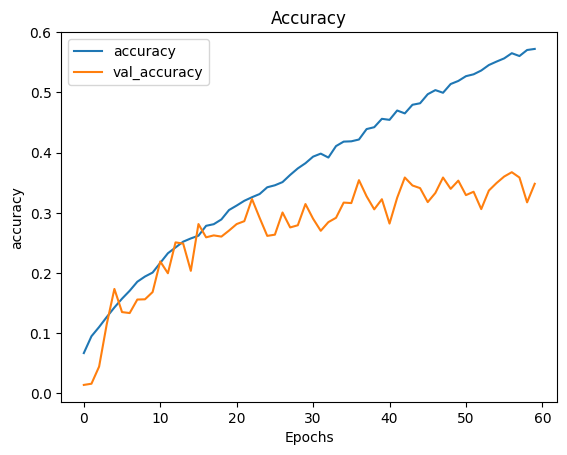

98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - Top2: 0.5134 - accuracy: 0.3659 - loss: 3.3856
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


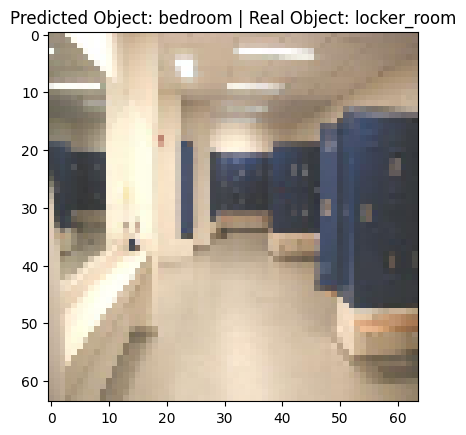

In [15]:
model3 = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.3),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model3.summary()
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model3, 64, 60)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 67)             │        34,371 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,796,099 (33.55 MB)

 Trainable params: 8,795,203 (33.55 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 25s 102ms/step - Top2: 0.0783 - accuracy: 0.0405 - loss: 6.1516 - val_Top2: 0.0902 - val_accuracy: 0.0489 - val_loss: 4.9229
Epoch 2/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - Top2: 0.1303 - accuracy: 0.0666 - loss: 4.0553 - val_Top2: 0.0918 - val_accuracy: 0.0453 - val_loss: 4.3810
Epoch 3/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - Top2: 0.1380 - accuracy: 0.0741 - loss: 3.9585 - val_Top2: 0.1415 - val_accuracy: 0.0790 - val_loss: 3.9691
Epoch 4/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - Top2: 0.1448 - accuracy: 0.0794 - loss: 3.8561 - val_Top2: 0.1062 - val_accuracy: 0.0597 - val_loss: 4.6249
Epoch 5/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - Top2: 0.1469 - accuracy: 0.0743 - loss: 3.8618 - val_Top2: 0.2048 - val_accuracy: 0.1042 - val_loss: 3.6515
Epoch 6/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - Top2: 0.1651 - accuracy: 0.0864 - loss: 3.7333 - val_Top2: 0.2240 - val_accuracy: 0.1214 - val_loss: 3.5791
Epoch 7/60
156/156 

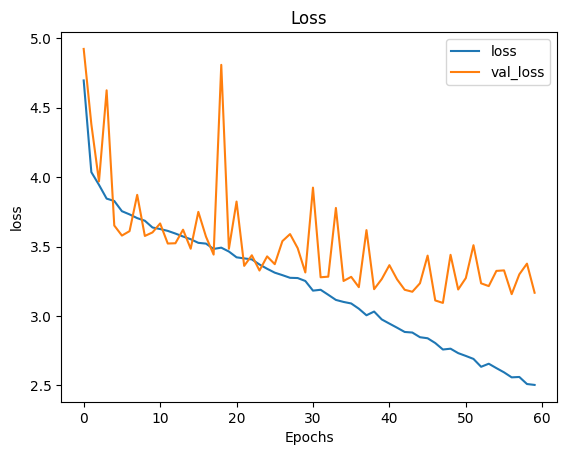

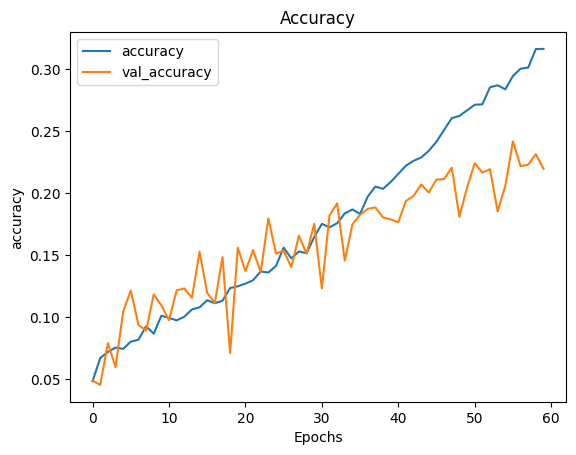

98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - Top2: 0.3424 - accuracy: 0.2264 - loss: 3.1213
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


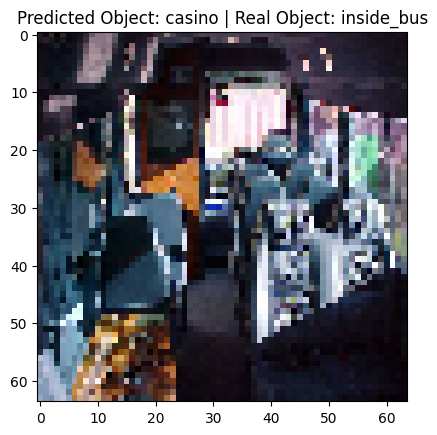

In [16]:
model4 = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model4.summary()
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model4, 64, 60)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 64, 64, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 67)             │        68,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,076,483 (7.92 MB)

 Trainable params: 2,074,691 (7.91 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - Top2: 0.1003 - accuracy: 0.0547 - loss: 4.9435 - val_Top2: 0.0677 - val_accuracy: 0.0152 - val_loss: 10.9833
Epoch 2/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - Top2: 0.1742 - accuracy: 0.0954 - loss: 3.7360 - val_Top2: 0.0429 - val_accuracy: 0.0277 - val_loss: 12.8821
Epoch 3/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - Top2: 0.2034 - accuracy: 0.1135 - loss: 3.5857 - val_Top2: 0.0890 - val_accuracy: 0.0441 - val_loss: 10.1265
Epoch 4/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - Top2: 0.2432 - accuracy: 0.1454 - loss: 3.4204 - val_Top2: 0.1619 - val_accuracy: 0.1006 - val_loss: 4.2775
Epoch 5/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - Top2: 0.2728 - accuracy: 0.1661 - loss: 3.3059 - val_Top2: 0.2673 - val_accuracy: 0.1631 - val_loss: 3.4258
Epoch 6/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - Top2: 0.2907 - accuracy: 0.1829 - loss: 3.1869 - val_Top2: 0.3186 - val_accuracy: 0.2080 - val_loss: 3.1414
Epoch 7/60
156/156

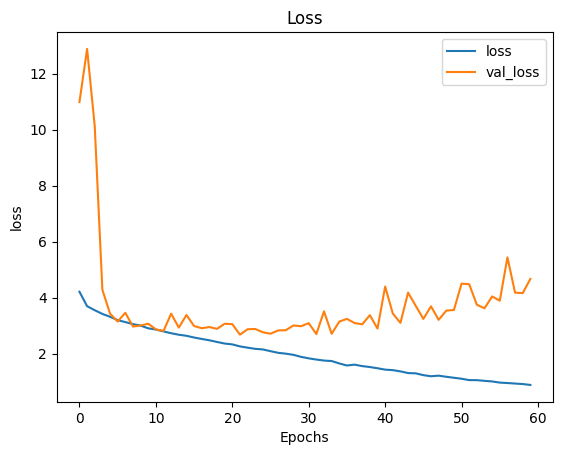

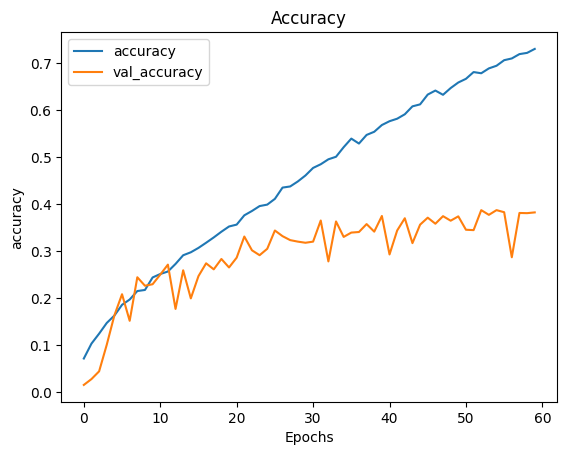

98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - Top2: 0.5436 - accuracy: 0.3987 - loss: 4.5473
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


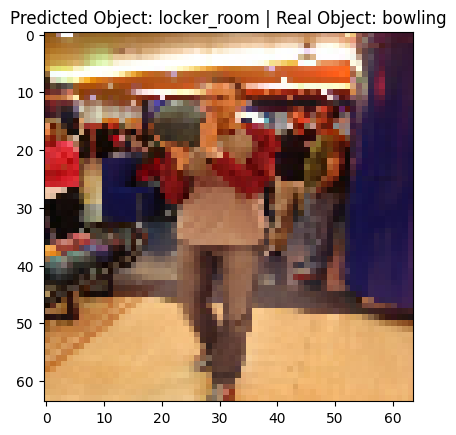

In [17]:
model5 = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.3),

        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(4, 4),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model5.summary()
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model5, 64, 60)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 67)             │        34,371 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 931,779 (3.55 MB)

 Trainable params: 930,883 (3.55 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - Top2: 0.0832 - accuracy: 0.0475 - loss: 4.9968 - val_Top2: 0.0589 - val_accuracy: 0.0136 - val_loss: 13.3908
Epoch 2/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - Top2: 0.1698 - accuracy: 0.0961 - loss: 3.8103 - val_Top2: 0.0665 - val_accuracy: 0.0140 - val_loss: 15.2609
Epoch 3/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - Top2: 0.1957 - accuracy: 0.1121 - loss: 3.6151 - val_Top2: 0.1038 - val_accuracy: 0.0513 - val_loss: 6.4380
Epoch 4/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - Top2: 0.2326 - accuracy: 0.1404 - loss: 3.4806 - val_Top2: 0.1503 - val_accuracy: 0.0854 - val_loss: 4.6968
Epoch 5/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - Top2: 0.2374 - accuracy: 0.1451 - loss: 3.4411 - val_Top2: 0.2128 - val_accuracy: 0.1279 - val_loss: 3.5050
Epoch 6/60
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - Top2: 0.2586 - accuracy: 0.1595 - loss: 3.3352 - val_Top2: 0.2569 - val_accuracy: 0.1579 - val_loss: 3.4309
Epoch 7/60
156/156 

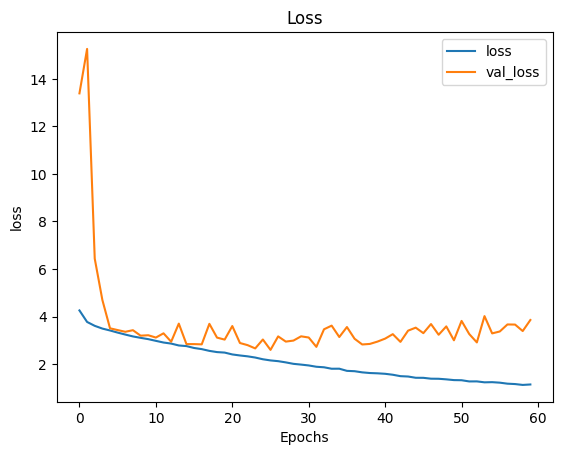

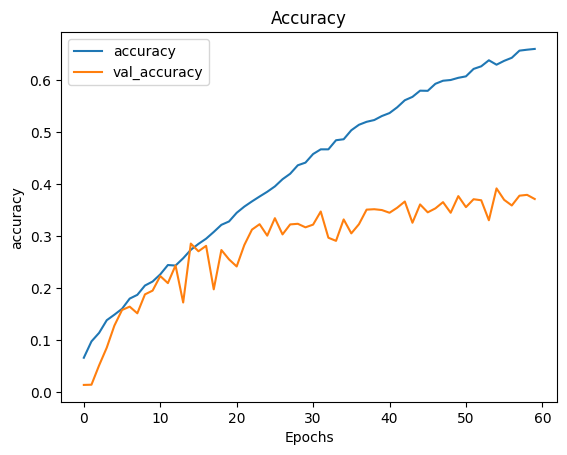

98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - Top2: 0.5178 - accuracy: 0.3730 - loss: 3.9122
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


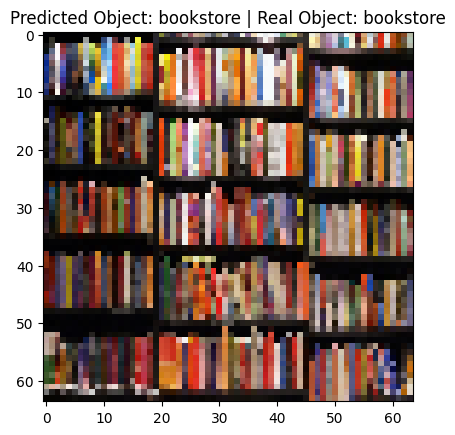

In [20]:
model6 = tf.keras.models.Sequential(
    [
        layers.Input(shape=(*size, 3)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(3, 3),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(3, 3),
        layers.Dropout(0.3),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(3, 3),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(y_test.shape[1], activation='softmax')
    ]
)

model6.summary()
model6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="Top2")])
predict(model6, 64, 60)